In [ ]:
!pip install git+https://github.com/pierluigic/languagechange.git

  Cloning https://github.com/pierluigic/languagechange.git to /tmp/pip-req-build-otr8nj6q
  Running command git clone --filter=blob:none --quiet https://github.com/pierluigic/languagechange.git /tmp/pip-req-build-otr8nj6q
  Resolved https://github.com/pierluigic/languagechange.git to commit ed1d1344b0d8fd8a8819b6830ff998b0c1ef2940
  Preparing metadata (setup.py) ... done
  Cloning https://****@github.com/pierluigic/LSCDetection.git to /tmp/pip-install-r81gubo4/lscdetection_8e78787447d3419a887cfd8899ee4fc6
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/pierluigic/LSCDetection.git' /tmp/pip-install-r81gubo4/lscdetection_8e78787447d3419a887cfd8899ee4fc6
  Resolved https://****@github.com/pierluigic/LSCDetection.git to commit d9c755a6fb498968a032e4f5266e42114b28ec17
  Preparing metadata (setup.py) ... done
  Cloning https://****@github.com/pierluigic/xl-lexeme.git to /tmp/pip-install-r81gubo4/wordtransformer_1c7d63396bc443c5979bad920c361e41
  Running comman

# **DWUGs**

**English**

In [ ]:
from languagechange.benchmark import DWUG

dwug_en = DWUG(language='EN',version='2.0.1')

dwug_en.show_usage_graph('plane_nn')

**Spanish**

In [ ]:
from languagechange.benchmark import DWUG

dwug_es = DWUG(language='ES',version='4.0.0 (full)')

dwug_es.show_usage_graph('servidor')

**ESSLI**

Upload the ESSLI ZIP

In [ ]:
!unzip WUG_ESSLI_Summer_School.zip -d WUG_ESSLI_Summer_School

unzip:  cannot find or open WUG_ESSLI_Summer_School.zip, WUG_ESSLI_Summer_School.zip.zip or WUG_ESSLI_Summer_School.zip.ZIP.


# **Computational representation of lexical items**

In [ ]:
from languagechange.models.representation.contextualized import XL_LEXEME

model = XL_LEXEME(device='cuda')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/696 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/38.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

**Compute vectors for the word plane**



In [ ]:
from languagechange.benchmark import DWUG
import numpy as np

word = 'plane_nn'

usages_time1 = dwug_en.get_word_usages(word,group='1')
usages_time2 = dwug_en.get_word_usages(word,group='2')

vectors_time1 = model.encode(usages_time1)
vectors_time2 = model.encode(usages_time2)

print(vectors_time1.shape)
print(usages_time1[0])

(100, 1024)
If the sun's rays be parallel to any plane, that plane to which they are parallel, is called a plane of shade.


**Compute vectors for the word graft and clustering usages**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

word = 'graft_nn'

usages_time1 = dwug_en.get_word_usages(word,group='1')
usages_time2 = dwug_en.get_word_usages(word,group='2')

vectors_time1 = model.encode(usages_time1)
vectors_time2 = model.encode(usages_time2)

vectors = np.concatenate((vectors_time1,vectors_time2),axis=0)

clustering=AgglomerativeClustering(n_clusters=None,linkage='average',metric='cosine',distance_threshold=0.5).fit(vectors)

**Visualization of the *graft* usages**

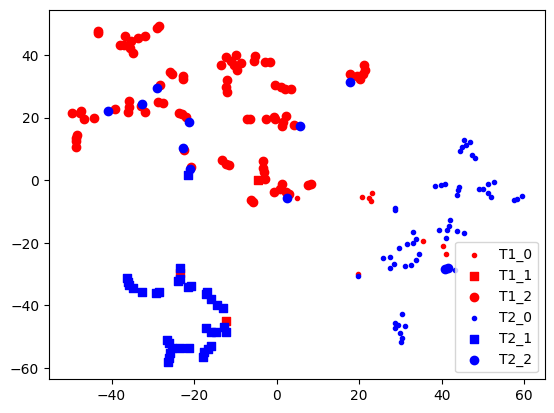

In [ ]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D

clustering_labels = clustering.labels_
clustering_labels_T1 = clustering_labels[:len(vectors_time1)]
clustering_labels_T2 = clustering_labels[len(vectors_time1):]

reduced_vectors = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(vectors)
reduced_vectors_T1 = reduced_vectors[:len(vectors_time1)]
reduced_vectors_T2 = reduced_vectors[len(vectors_time1):]

markers = list(Line2D.markers.keys())

for j,label in enumerate(set(clustering_labels_T1)):
  cluster_vectors = reduced_vectors_T1[np.where(clustering_labels_T1 == label)[0]]
  X,Y = cluster_vectors[:,0], cluster_vectors[:,1]
  plt.scatter(X, Y, color='red', marker=markers[j], label=f'T1_{label}')

for j,label in enumerate(set(clustering_labels_T2)):
  cluster_vectors = reduced_vectors_T2[np.where(clustering_labels_T2 == label)[0]]
  X,Y = cluster_vectors[:,0], cluster_vectors[:,1]
  plt.scatter(X, Y, color='blue', marker=markers[j], label=f'T2_{label}')

plt.legend(numpoints=1)
plt.show()

**Inspecting the *graft* clusters**

In [ ]:
from IPython.display import Markdown, display

def text_formatting(usage,time_label):
      start, end = usage.start(), usage.end()
      formatted_text = f'T{time_label}\t' + usage[:start] + '**' + usage[start:end] + '**' + usage[end:]
      return formatted_text

cluster2ids = {}
usages = usages_time1 + usages_time2
time_label = [1]*len(usages_time1) + [2]*len(usages_time2)

for i,label in enumerate(clustering.labels_):
  if not label in cluster2ids:
    cluster2ids[label] = []
  cluster2ids[label].append(i)


for c in sorted(cluster2ids):
  print(f'CLUSTER {c}')
  for idx in cluster2ids[c][:10]:
    display(Markdown(text_formatting(usages[idx], time_label[idx])))
  print('----------------------------')

CLUSTER 0


T1	" Mr. STOMS asks: ' Why **graft** on the quince stock at all? '

T1	The influence of the **graft** on the stock seems scarcely to extend beyond the power of communicating disease.

T1	Another perpendicular stroke slits the stock for the **graft**, leaving a perfectly smooth face cut for its reception.

T1	* The influence exerted by the **graft** on the stock, although not strictly within the limits of thi chapter, offers an interesting subject for inquiry.

T1	The wedge b opens the stock to receive the **graft**.

T1	becomes apparent, people have to fear nothing more wicked than their own evil minds, the place hath been less regarded, as the other portions of the island are more closely settled; but in the days of the pirate Kid, the sole representative of the famous town of Harlaem in the new world, consisted of one broad long roofed cottage, which indeed, in the consequence of its owner, might have vied with its rival in den bosch, ' -- for suiting to its lofty pretensions, though the building was of one story, and the eaves almost kissed the ground, yet the gable ends soared steeply up like a pyramid, and were both ornamented by points or stairs, in the true style of the Keysar **Graft**, the Harring Vliet, and the Bompies; from the centre of the mansion arose a sort of structure that appeared like a pigeon house, containing one huge long door, used for the reception of goods, and although at the top of the edifice, was the place

T1	But the operation is never successful unless the **graft** and stock are nearly allied, and the greater the affinity the more certain the success. "

T1	Milton was a Saint-Germain with a **graft** of the roseate Early-Catherine.

T1	Whenever it has not, when there has been an indulgence in fine writing merely, the **graft**, however ornamental, betrays itself.

T2	Good as Ever " I think there is less **graft** in the police department these days, but from the standpoint of a skilled, professional burglar I think

----------------------------
CLUSTER 1


T1	When the **graft** is united and begins to make a growth, the bandage

T1	Indeed, it is a mooted question whether **grafts** should be taken at all from such a source; but I see no reason for going to this extreme.

T1	disposition, and is somewhat forgetful of qwq cealed a great deal of truth: " The setter is a product of art, as much as the Queen Claude Ilium or double rose; he is a dumb dog, grafted on the running dog, and which returns to the wild stock, like the double rose, when the **graft** fails to take effect. "

T2	He asked what evidence there was that the " immunity " so commonly spoken of was an immunity directed against the tumor as such, or whether it might not merely be an immunity directed against the tumor **graft** considered as a genetically foreign cell?

T2	The entire dosage regimen is a knife edge in which underdosage will lead to the rejection of the **graft** and overdosage to secondary damage on cells other than those that transact immunological responses?

T2	Lung transplants done in 32 patients during the last ten years have been quite disappointing, with only 3 patients living for more than thirty days | with a functioning **graft**.

T2	is the use of immunosuppressive agents, drugs that depress the immunological response long enough to tide the patient over the period during which rejection might occur and at the same time to help the **graft** to start to undergo the rather mysterious adaptative process which ends by making it fairly acceptable to the body.

T2	skin **graft** from someone else or acquiring someone else's kidney.

T2	Patients with functioning **grafts** have an average survival of around two and a half years, and those living more than five years are not uncommon.

T2	For the leukemia patient, for example, the cloned cells could provide an infusion of fresh bone marrow, and for the burn victim, **grafts** of brand-new skin.

----------------------------
CLUSTER 2


T1	A maiden plant (a tree but one year from the **graft**,) being planted " is to be headed down to four buds or eyes

T1	When the operation is performed close to the ground, or even under the surface; after the **graft** is properly tied draw up earth all round, leaving one or two buds above; this method is both convenient, and in many instances preferable, and more to be depended upon.

T1	Fine mould or peat, from the box in which the roots were packed, is sprinkled over the bottom, the **grafts** are placed in, slanting, in successive layers, and all the spaces filled with mould or peat.

T1	For the same reason, root-grafting the pear is not adopted, especially as slightly unfavorable causes are apt to produce far greater failures of such **grafts** than with the apple.

T1	In the following spring, the grafted trees may be looked over, and any young suckers growing from the stock or tree that may be liable to injure and retard the growth of the **graft**, may be taken off.

T1	**Grafts** often bear some fine clusters the first season of growth, and pretty considerably the second. "

T1	In all cases success is more certain, when the wax is closely pressed so as to fit closely to every part, and leave no interstices; and it is indispensible that every por tion of the wound on the stock and **graft** be totally excluded from the external air.

T1	Grown on this, the size is vastly increased, the flavor and texture improved, and the low structure prevents these great fruits from being blown off, while the bud unites with the quince-stock with so great firmness, that few trees of this variety ever fracture at the **graft**, and all seem to grow with as much vigor as on the pear stock.

T1	The great length of that portion of the **graft** in contact with the bark and fresh wood, greatly facilitates their union; while the cut face of the stock is speedily covered with a new growth by that part of the graft which rests upon it.

T1	Where it becomes desirable to preserve rare sorts, which have been grafted late in spring, a loose wrapper of white paper round the **graft** will protect it from the drying and scorching rays of the sun; or shrivelling and failure will often be prevented by covering the whole graft with a wax plaster; or by encasing it in moss kept damp by occasional applications of water.

----------------------------


# **Lexical Semantic Change Metrics**

**Average Pairwise Distance**

In [ ]:
from languagechange.models.change.metrics import APD, PRT, PJSD

word = 'plane_nn'

usages_time1 = dwug_en.get_word_usages(word,group='1')
usages_time2 = dwug_en.get_word_usages(word,group='2')

vectors_time1 = model.encode(usages_time1)
vectors_time2 = model.encode(usages_time2)

apd_metric = APD()

apd_metric.compute_scores(vectors_time1,vectors_time2)


0.7820556854428371

**Prototype Distance**

In [ ]:
from languagechange.models.change.metrics import APD, PRT, PJSD

word = 'plane_nn'

usages_time1 = dwug_en.get_word_usages(word,group='1')
usages_time2 = dwug_en.get_word_usages(word,group='2')

vectors_time1 = model.encode(usages_time1)
vectors_time2 = model.encode(usages_time2)

prt_metric = PRT()

prt_metric.compute_scores(vectors_time1,vectors_time2)


0.71098393201828

**Probabilities Jensen-Shannon Distance**

In [ ]:
from languagechange.models.change.metrics import APD, PRT, PJSD

word = 'plane_nn'

usages_time1 = dwug_en.get_word_usages(word,group='1')
usages_time2 = dwug_en.get_word_usages(word,group='2')

vectors_time1 = model.encode(usages_time1)
vectors_time2 = model.encode(usages_time2)

clustering=AgglomerativeClustering(n_clusters=None,linkage='average',metric='cosine',distance_threshold=0.5)
pjsd_metric = PJSD()

pjsd_metric.compute_scores(vectors_time1,vectors_time2,clustering)


0.7130935205364123